# Jupyter setup

In [1]:
# Needed to import local modules
import os
import sys
sys.path.insert(0, os.path.abspath('lib'))

# Chapter 02

In [2]:
import numpy as np
from lib import linear_regression

In [3]:
X, Y = np.loadtxt("data/pizza.txt", skiprows=1, unpack=True)


In [4]:
iterations=10000
lr=0.01

In [5]:
w, b = linear_regression.train(X, Y, iterations=iterations, lr=lr)


Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

Iteration  963 => Loss: 31.824687
Iteration  964 => Loss: 31.794587
Iteration  965 => Loss: 31.764687
Iteration  966 => Loss: 31.734987
Iteration  967 => Loss: 31.705487
Iteration  968 => Loss: 31.704247
Iteration  969 => Loss: 31.672413
Iteration  970 => Loss: 31.640780
Iteration  971 => Loss: 31.609347
Iteration  972 => Loss: 31.578113
Iteration  973 => Loss: 31.547080
Iteration  974 => Loss: 31.516247
Iteration  975 => Loss: 31.485613
Iteration  976 => Loss: 31.455180
Iteration  977 => Loss: 31.424947
Iteration  978 => Loss: 31.394913
Iteration  979 => Loss: 31.365080
Iteration  980 => Loss: 31.335447
Iteration  981 => Loss: 31.306013
Iteration  982 => Loss: 31.276780
Iteration  983 => Loss: 31.247747
Iteration  984 => Loss: 31.218913
Iteration  985 => Loss: 31.190280
Iteration  986 => Loss: 31.189733
Iteration  987 => Loss: 31.158767
Iteration  988 => Loss: 31.128000
Iteration  989 => Loss: 31.097433
Iteration  990 => Loss: 31.067067
Iteration  991 => Loss: 31.036900
Iteration  992

In [6]:
print("\nw=%3f, b=%3f" % (w, b))


w=1.100000, b=12.930000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

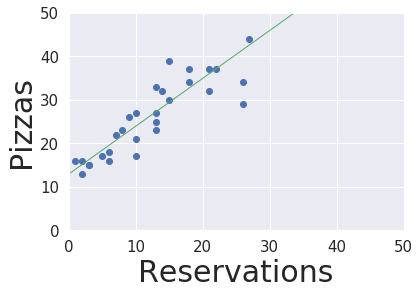

In [8]:
sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, linear_regression.predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.show()

In [9]:
prediction = 50

In [10]:
print("Prediction: x=%d => y=%.2f" % (prediction, linear_regression.predict(prediction, w, b)))

Prediction: x=50 => y=67.93


# Chapter 03

In [11]:
# Compute losses for w ranging from -1 to 4
weights = np.linspace(-1.0, 4.0, 200)
losses = [linear_regression.loss(X, Y, w, 0) for w in weights]

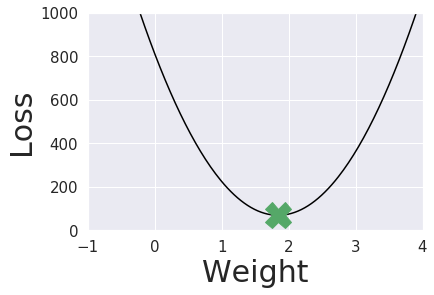

In [12]:
# Plot weights and losses
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight", fontsize=30)
plt.ylabel("Loss", fontsize=30)
plt.plot(weights, losses, color="black")

# Put a green cross on the minimum loss
min_index = np.argmin(losses)
plt.plot(weights[min_index], losses[min_index], "gX", markersize=26)

plt.show()

In [14]:
from lib import gradient

In [17]:
w = gradient.train(X, Y, iterations=100, lr=0.001)
print("\nw=%.10f" % w)

Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 304.3630879787
Iteration    2 => Loss: 143.5265791020
Iteration    3 => Loss: 92.6549949641
Iteration    4 => Loss: 76.5646303400
Iteration    5 => Loss: 71.4753484132
Iteration    6 => Loss: 69.8656402969
Iteration    7 => Loss: 69.3564996643
Iteration    8 => Loss: 69.1954616593
Iteration    9 => Loss: 69.1445263431
Iteration   10 => Loss: 69.1284158205
Iteration   11 => Loss: 69.1233201627
Iteration   12 => Loss: 69.1217084379
Iteration   13 => Loss: 69.1211986595
Iteration   14 => Loss: 69.1210374197
Iteration   15 => Loss: 69.1209864206
Iteration   16 => Loss: 69.1209702899
Iteration   17 => Loss: 69.1209651878
Iteration   18 => Loss: 69.1209635741
Iteration   19 => Loss: 69.1209630637
Iteration   20 => Loss: 69.1209629022
Iteration   21 => Loss: 69.1209628512
Iteration   22 => Loss: 69.1209628350
Iteration   23 => Loss: 69.1209628299
Iteration   24 => Loss: 69.1209628283
Iteration   25 => Loss: 69.1209628278
Iteration